# HELP NEEDED: Lakshmi & Team: SEE lines 3, 4, and 21 re: VENUE ERROR

In [ ]:
# import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium
import os
!pip install folium
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline

print('Libraries imported.')

In [2]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [3]:
def get_venues(lat,lng):

    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF' # your Foursquare ID
    CLIENT_SECRET = 'GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW' # your Foursquare Secret
    VERSION = '20200605' # Foursquare API version

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT)

    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass

    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [4]:
def get_venue_details(venue_id):

    CLIENT_ID = 'NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF' # your Foursquare ID
    CLIENT_SECRET = 'GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW' # your Foursquare Secret
    VERSION = '20200605' # Foursquare API version

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        venue_id,
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION)
    print (url)

    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,
        venue_tips])
    except KeyError:
        pass

    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']

    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)

    for data in features:
        borough = data['properties']['borough']
        neighborhood_name = data['properties']['name']

        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]

        new_york_data = new_york_data.append({'Borough': borough,
                                        'Neighborhood': neighborhood_name,
                                        'Latitude': neighborhood_lat,
                                        'Longitude': neighborhood_lon}, ignore_index=True)

    return new_york_data

In [6]:
new_york_data=get_new_york_data()

In [7]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
new_york_data.shape

(306, 4)

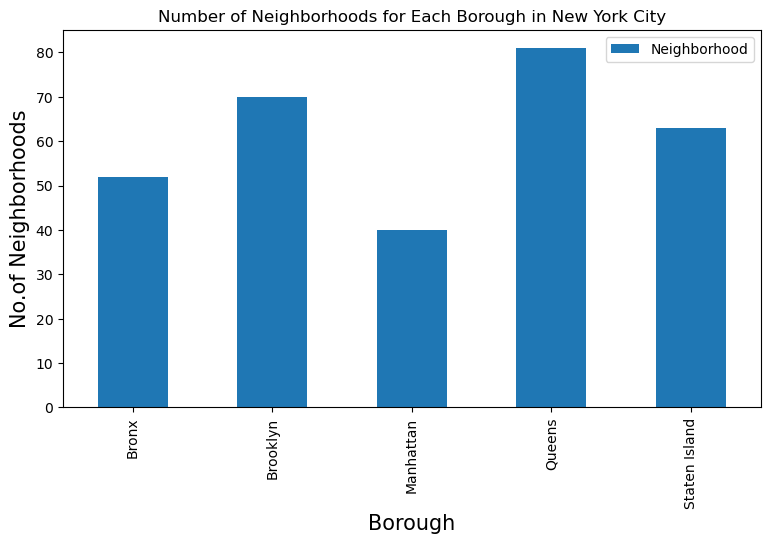

In [9]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhoods for Each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhoods', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [11]:
# prepare neighborhood list that contains Japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_resturants=venues[venues['Category']=='Japanese Restaurant']
    print('(',count,'/',len(new_york_data),')','Japanese Resturants in '+Neighborhood+', '+Borough+':'+str(len(japanese_resturants)))
    for resturant_detail in japanese_resturants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood,
                                            'ID': id,
                                            'Name' : name
                                        }, ignore_index=True)
    count+=1

( 1 / 306 ) Japanese Resturants in Wakefield, Bronx:0
( 2 / 306 ) Japanese Resturants in Co-op City, Bronx:0
( 3 / 306 ) Japanese Resturants in Eastchester, Bronx:0
( 4 / 306 ) Japanese Resturants in Fieldston, Bronx:0
( 5 / 306 ) Japanese Resturants in Riverdale, Bronx:2
( 6 / 306 ) Japanese Resturants in Kingsbridge, Bronx:2
( 7 / 306 ) Japanese Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Japanese Resturants in Woodlawn, Bronx:0
( 9 / 306 ) Japanese Resturants in Norwood, Bronx:0
( 10 / 306 ) Japanese Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Japanese Resturants in Baychester, Bronx:0
( 12 / 306 ) Japanese Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Japanese Resturants in City Island, Bronx:1
( 14 / 306 ) Japanese Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Japanese Resturants in University Heights, Bronx:0
( 16 / 306 ) Japanese Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Japanese Resturants in Fordham, Bronx:0
( 18 / 306 ) Japanese Resturants in Ea

( 138 / 306 ) Japanese Resturants in Richmond Hill, Queens:0
( 139 / 306 ) Japanese Resturants in Flushing, Queens:2
( 140 / 306 ) Japanese Resturants in Long Island City, Queens:1
( 141 / 306 ) Japanese Resturants in Sunnyside, Queens:1
( 142 / 306 ) Japanese Resturants in East Elmhurst, Queens:0
( 143 / 306 ) Japanese Resturants in Maspeth, Queens:1
( 144 / 306 ) Japanese Resturants in Ridgewood, Queens:0
( 145 / 306 ) Japanese Resturants in Glendale, Queens:0
( 146 / 306 ) Japanese Resturants in Rego Park, Queens:1
( 147 / 306 ) Japanese Resturants in Woodhaven, Queens:0
( 148 / 306 ) Japanese Resturants in Ozone Park, Queens:0
( 149 / 306 ) Japanese Resturants in South Ozone Park, Queens:0
( 150 / 306 ) Japanese Resturants in College Point, Queens:1
( 151 / 306 ) Japanese Resturants in Whitestone, Queens:2
( 152 / 306 ) Japanese Resturants in Bayside, Queens:0
( 153 / 306 ) Japanese Resturants in Auburndale, Queens:1
( 154 / 306 ) Japanese Resturants in Little Neck, Queens:1
( 155 

( 271 / 306 ) Japanese Resturants in Mount Hope, Bronx:0
( 272 / 306 ) Japanese Resturants in Sutton Place, Manhattan:0
( 273 / 306 ) Japanese Resturants in Hunters Point, Queens:3
( 274 / 306 ) Japanese Resturants in Turtle Bay, Manhattan:3
( 275 / 306 ) Japanese Resturants in Tudor City, Manhattan:4
( 276 / 306 ) Japanese Resturants in Stuyvesant Town, Manhattan:2
( 277 / 306 ) Japanese Resturants in Flatiron, Manhattan:4
( 278 / 306 ) Japanese Resturants in Sunnyside Gardens, Queens:1
( 279 / 306 ) Japanese Resturants in Blissville, Queens:0
( 280 / 306 ) Japanese Resturants in Fulton Ferry, Brooklyn:1
( 281 / 306 ) Japanese Resturants in Vinegar Hill, Brooklyn:0
( 282 / 306 ) Japanese Resturants in Weeksville, Brooklyn:0
( 283 / 306 ) Japanese Resturants in Broadway Junction, Brooklyn:1
( 284 / 306 ) Japanese Resturants in Dumbo, Brooklyn:1
( 285 / 306 ) Japanese Resturants in Manor Heights, Staten Island:0
( 286 / 306 ) Japanese Resturants in Willowbrook, Staten Island:0
( 287 / 3

In [12]:
japanese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse


In [13]:
japanese_rest_ny.shape

(188, 4)

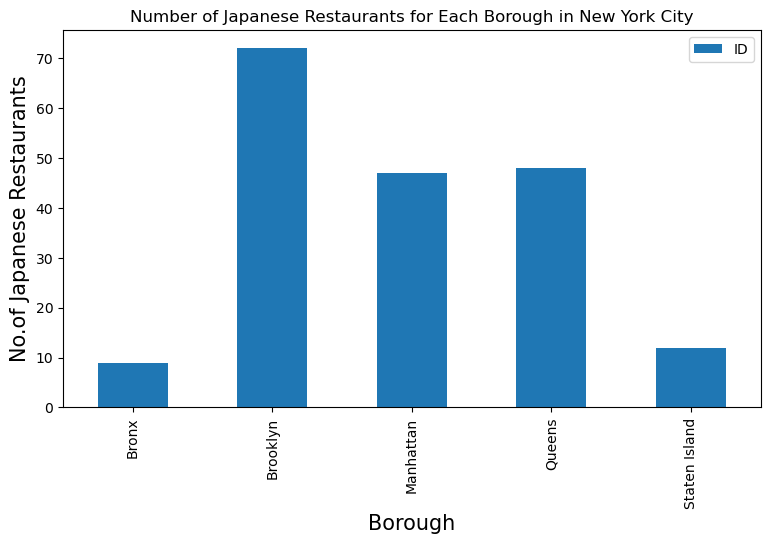

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Japanese Restaurants for Each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Restaurants', fontsize=15)
#giving a bar plot
japanese_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

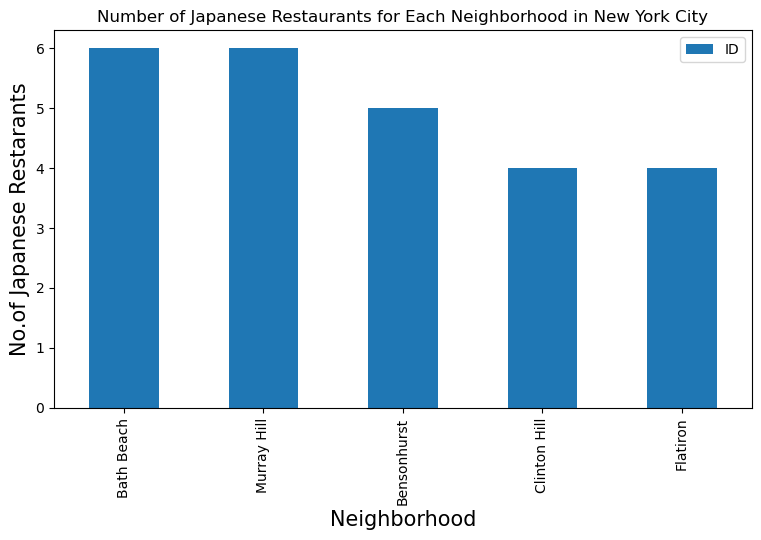

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Japanese Restaurants for Each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Restarants', fontsize=15)
#giving a bar plot
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [16]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Bath Beach']

,Borough,Neighborhood,ID,Name
41,Brooklyn,Bath Beach,51f42bb3498e2681264e00a1,Kasumi Sushi & BBQ Restaurant
42,Brooklyn,Bath Beach,4c326b9fa0ced13ac126156e,Ichi Sushi
43,Brooklyn,Bath Beach,4b787863f964a52080d02ee3,Shiki Japanese Hibachi
44,Brooklyn,Bath Beach,513e7ec8e4b07f4fa1b53b3d,Fuki Sushi Japanese Restaurant
45,Brooklyn,Bath Beach,4bad45c9f964a52089403be3,Chikurin
46,Brooklyn,Bath Beach,507ae732e4b0d3b809849474,Nagoya Sushi


In [17]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
81,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
82,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
83,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
84,Manhattan,Murray Hill,49db8b67f964a520d85e1fe3,Aburiya Kinnosuke
122,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi
123,Queens,Murray Hill,5cf07afa66f3cd002c8b3ae6,Izakaya Mew


In [18]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Bensonhurst']

,Borough,Neighborhood,ID,Name
12,Brooklyn,Bensonhurst,51f42bb3498e2681264e00a1,Kasumi Sushi & BBQ Restaurant
13,Brooklyn,Bensonhurst,4b787863f964a52080d02ee3,Shiki Japanese Hibachi
14,Brooklyn,Bensonhurst,513e7ec8e4b07f4fa1b53b3d,Fuki Sushi Japanese Restaurant
15,Brooklyn,Bensonhurst,4c326b9fa0ced13ac126156e,Ichi Sushi
16,Brooklyn,Bensonhurst,507ae732e4b0d3b809849474,Nagoya Sushi


In [19]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Clinton Hill']

,Borough,Neighborhood,ID,Name
50,Brooklyn,Clinton Hill,591f7c5f35f9836382455eca,U-Gu
51,Brooklyn,Clinton Hill,5739c66c498e7ef6085cec4f,Karasu
52,Brooklyn,Clinton Hill,5aa09a586eda026624b25ecb,66S Fusion
53,Brooklyn,Clinton Hill,4e3cadcb1f6e844231dbe017,Waza


In [20]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Flatiron']

,Borough,Neighborhood,ID,Name
176,Manhattan,Flatiron,5bd7a5561c675b0039be9acc,HALL
177,Manhattan,Flatiron,4f7b61f6e4b07aaa5d524842,OOTOYA 大戸屋 (OOTOYA)
178,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish
179,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago


In [21]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood,
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips
                                                }, ignore_index=True)
    count+=1

https://api.foursquare.com/v2/venues/503cfaffe4b066d39de5005a?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID                      Name  Likes  Rating  Tips
0  503cfaffe4b066d39de5005a  Aoyu Japanese Restaurant     32     9.0    19
( 1 / 188 ) processed
https://api.foursquare.com/v2/venues/4b0b311af964a520642e23e3?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID             Name  Likes  Rating  Tips
0  4b0b311af964a520642e23e3  Palace of Japan     38     8.5    26
( 2 / 188 ) processed
https://api.foursquare.com/v2/venues/503cfaffe4b066d39de5005a?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID                      Name  Likes  Rating  Tips
0  503cfaff

                         ID          Name  Likes  Rating  Tips
0  4d1004a56331a0930a505494  Sakura Tokyo     23     7.2    19
( 25 / 188 ) processed
https://api.foursquare.com/v2/venues/5091d1ffe4b0f08bb9df6701?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID           Name  Likes  Rating  Tips
0  5091d1ffe4b0f08bb9df6701  Masago Bistro     11     6.3     7
( 26 / 188 ) processed
https://api.foursquare.com/v2/venues/4d5c12a01e43236a87eb1583?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID        Name  Likes  Rating  Tips
0  4d5c12a01e43236a87eb1583  Sake Sushi     31     7.9    49
( 27 / 188 ) processed
https://api.foursquare.com/v2/venues/5cb5e5f9a35f4600255406c6?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDS

                         ID                        Name  Likes  Rating  Tips
0  4b33fd94f964a520842325e3  Arirang Hibachi Steakhouse     76     7.5    21
( 49 / 188 ) processed
https://api.foursquare.com/v2/venues/4c140e42a1010f4742d24b18?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605
                         ID    Name  Likes  Rating  Tips
0  4c140e42a1010f4742d24b18  Sakura     10     8.0     3
( 50 / 188 ) processed
https://api.foursquare.com/v2/venues/591f7c5f35f9836382455eca?&client_id=NFEUG2AVLOJSDTKP0ZJVTM4H32WDHLV52IEP5S2RQFXFJXWF&client_secret=GGKUB4KE202WKAUU4FMN0PFKKDSTBC5XJI0YG045ZJRI54MW&v=20200605


KeyError: 'venue'

In [22]:
japanese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.0,19
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan,38,8.5,26
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.0,19
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan,38,8.5,26
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse,34,7.7,18


In [23]:
japanese_rest_stats_ny.shape

(50, 7)

In [24]:
japanese_rest_ny.shape

(188, 4)

In [25]:
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny.csv', index=False)

In [26]:
japanese_rest_stats_ny_csv=pd.read_csv('japanese_rest_stats_ny.csv')

In [27]:
japanese_rest_stats_ny_csv.shape

(50, 7)

In [28]:
japanese_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.0,19
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan,38,8.5,26
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.0,19
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan,38,8.5,26
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse,34,7.7,18


In [29]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [30]:
japanese_rest_stats_ny['Likes']=japanese_rest_stats_ny['Likes'].astype('float64')
japanese_rest_stats_ny['Tips']=japanese_rest_stats_ny['Tips'].astype('float64')

In [31]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [32]:
# Resturant with maximum Likes
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              4c7f0887fb74236a7727f9b9
Name                        Samurai Mama
Likes                                898
Rating                                 9
Tips                                 247
Name: 30, dtype: object

In [33]:
# Resturant with maximum Rating
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                  Greenpoint
ID              5e4c841b1485b40007d77e6e
Name                      Rule Of Thirds
Likes                                 44
Rating                               9.1
Tips                                   6
Name: 18, dtype: object

In [34]:
# Resturant with maximum Tips
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              4c7f0887fb74236a7727f9b9
Name                        Samurai Mama
Likes                                898
Rating                                 9
Tips                                 247
Name: 30, dtype: object

In [35]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [42]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
8,Cobble Hill,9.10
20,Park Slope,8.85
11,Fort Greene,8.80
24,Spuyten Duyvil,8.75
22,Riverdale,8.75
16,Kingsbridge,8.75
13,Greenpoint,8.65
4,Brooklyn Heights,8.65
26,Williamsburg,8.50
21,Prospect Heights,8.40


In [43]:
ny_borough_stats= japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [44]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,8.411111
1,Brooklyn,7.534146


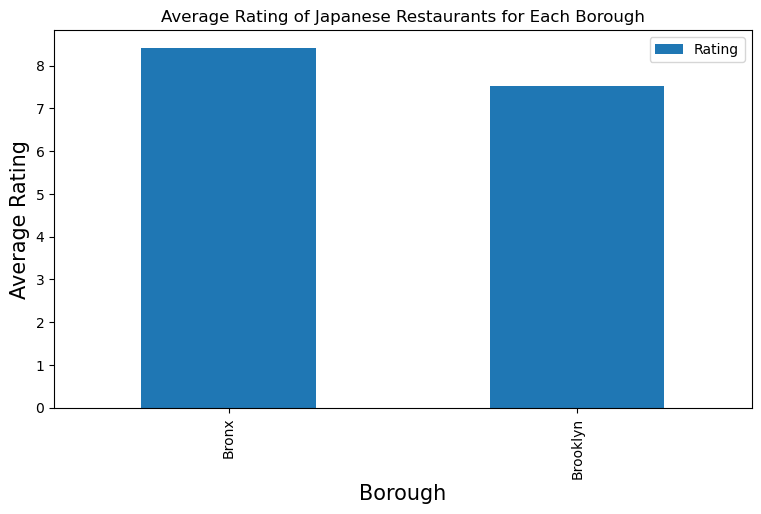

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average Rating of Japanese Restaurants for Each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [47]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]

In [48]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [49]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [50]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bay Ridge,40.625801,-74.030621,7.733333
1,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.300000
2,Brooklyn,Bensonhurst,40.611009,-73.995180,7.020000
3,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.650000
4,Brooklyn,Carroll Gardens,40.680540,-73.994654,7.900000
5,Bronx,Castle Hill,40.819014,-73.848027,7.800000
6,Bronx,City Island,40.847247,-73.786488,7.700000
7,Brooklyn,Cobble Hill,40.687920,-73.998561,9.100000
8,Brooklyn,Crown Heights,40.670829,-73.943291,7.000000
9,Brooklyn,Dyker Heights,40.619219,-74.019314,7.550000


In [51]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [52]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [53]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [54]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)
# add incidents to map
ny_map.add_child(incidents)

In [ ]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough_Boundaries.geojson'

map = ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
        key_on='feature.properties.boro_name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')